In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

# %matplotlib inline
%matplotlib notebook


Let $\theta$ be the polar angle and $\phi$ be the azimuthal angle, the **spherical harmonics** are defined as:
$$
    Y^m_l(\theta, \phi) \equiv \sqrt{\frac{(2l + 1)}{4\pi} \frac{(l-m)!}{(l+m)}} e^{i m \phi} P^m_l(\cos\theta)
$$
where $P^m_n$ is the **associcated Legendre function**.
It is defined as:
$$
    P^m_n(x) \equiv (-1)^m(1-x^2)^{m/2} \left(\frac{d}{dx}\right)^m P_n(x)
$$
where $P_n$ is the $n$-th **Legendre polynomial**.

The first few associate Legendre functions $P^m_n(\cos\theta)$ are:
\begin{align}
    P^0_0(\cos\theta) &= 1 \\
    P^0_1(\cos\theta) &= x \\
    P^0_2(\cos\theta) &= \frac{1}{2}(3x^2 - 1) \\
    P^1_1(\cos\theta) &= \frac{1}{2}(5x^3 - 3x) \\
    P^3_n(\cos\theta) &= \frac{1}{8}(35x^4 - 30x^2 + 3) \\
    P^m_n(\cos\theta) &= \frac{1}{8}(63x^5 - 70x^3 + 15x)
\end{align}

The first few Legendre polynomials are:
$$
\begin{align}
    P_0(x) &= 1 \\
    P_1(x) &= x \\
    P_2(x) &= \frac{1}{2}(3x^2 - 1) \\
    P_3(x) &= \frac{1}{2}(5x^3 - 3x) \\
    P_4(x) &= \frac{1}{8}(35x^4 - 30x^2 + 3) \\
    P_5(x) &= \frac{1}{8}(63x^5 - 70x^3 + 15x)
\end{align}
$$


### Some properites of spherical harmonics

The spherical harmoics are orthogonal, in other words:
$$
    \int_0^\pi \int _0^{2\pi} 
    \left[Y^m_l(\theta, \phi)\right]^\ast \left[Y^{m'}_{l'} (\theta, \phi)\right] 
    d(\cos\theta) d\phi = \delta_{l l'} \delta_{m m'}
$$
where $^\ast$ denotes the complex conjugate, and $\delta$ is the Kronecker delta:
$$
    \delta_{ij} =
    \begin{cases}
            1, &         \text{if } i=j,\\
            0, &         \text{if } i\neq j.
    \end{cases}$$

In [10]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 0, 1

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
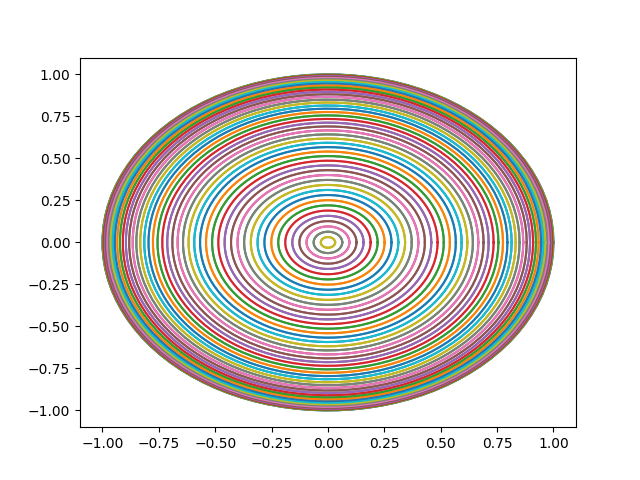

In [14]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
# ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
ax.plot(x, y)
plt.show()